In [2]:
import yt
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import math

In [35]:
#The units are always log10(Msun/kpc^3)

filename = 'grid_Eagle100_28_dm_mass_512.hdf5'
with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])


Keys: <KeysViewHDF5 ['grid']>


In [36]:
len(data[0])
out = [None]*len(data)
count = 0
for item in data:
    out[count] = item.tolist()
    count+=1

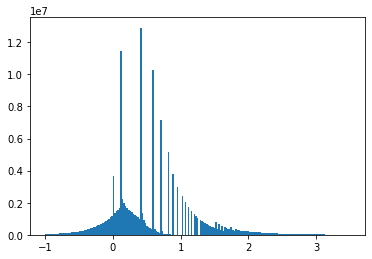

In [37]:
dm = np.array(out)
tbins = np.linspace(-1,3.5,200)
jk=plt.hist(dm.flatten(),bins=tbins)

In [38]:
voxelized_data = out
size = len(out)
a = 1
b = 255
min_val = -1
max_val = 3.5
for i in range(size):
    for j in range(size):
        for k in range(size):
            # if voxel > -Infinity
            if (not math.isinf(voxelized_data[i][j][k])) and (int(voxelized_data[i][j][k]) is not 0):
                # scale data between [a,b]
                # multiply by 1000 to capture decimal precision into UInt8
                # convert from float to int
                out[i][j][k] = int( ( ( b - a ) * ( (voxelized_data[i][j][k] - min_val ) / ( max_val - min_val ) ) ) + a )
                if float(out[i][j][k]) < 1.0:
                    out[i][j][k] = int(0)
            else: # reserve val=0 when voxel=-Infinity (artefact from taking log10(0))
                out[i][j][k] = int(0)

In [39]:
with open( str(len(data)) + '_PartType1_mass.json', 'w' ) as file:
            json.dump( out, file, separators=(',', ':') )